## Import resources and display image

Some background information can be found here:
 http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv   

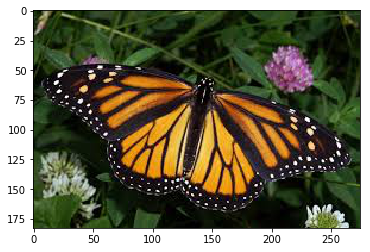

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\butterfly.jpg')
image.shape

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)


We will focus on the color of each pixel. We feed in a 2 D array:

In [30]:
pixel_vals = image_copy.reshape((-1,3))

# Convert to float type:
pixel_vals = np.float32(pixel_vals)

## Implement K-means clustering

In [31]:
# Performk k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
# When to stop value of epsilon or max number of iterations
k = 2 # binary case
retval, labels,centers=cv2.kmeans(pixel_vals, k, None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# None refers to the labels
# criteria: Number of attempts
# Number of center points

In [35]:
# Convert this back into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

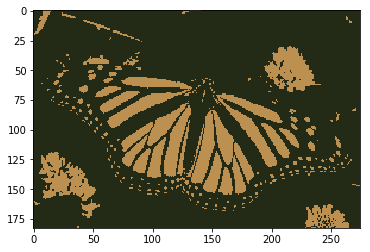

In [41]:
# Reshape the data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0],image_copy.shape[1])

plt.imshow(segmented_image)

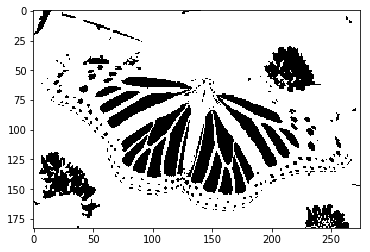

In [42]:
# Visualise one segment
plt.imshow(labels_reshape ==1, cmap ='gray')

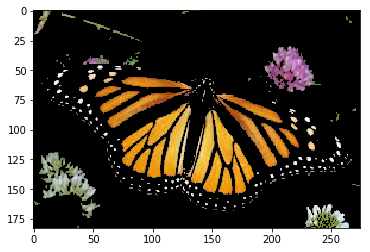

In [45]:
# Mask image segment
masked_image = np.copy(image_copy)

masked_image[labels_reshape ==1] = [0, 0, 0]

plt.imshow(masked_image)

You can change the k to 6 etc. You can use the segments to mask. 